# EPS 109 "Computer Simulations in Earth and Planetary Science"
### Instructor: Burkhard Militzer
### Combined lab and homework assignment on sound and audio files: Part 4


From bCourses, download three files: "audio_file_A.wav", "audio_file_A_SID.wav", and "audio_file_C_SID.wav". You need ot replace SID by your student ID number. 

(1) Execute the following commands at the beginning of for this and all following parts. 

In [1]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import numpy as np
import simpleaudio as sa
from scipy.io import wavfile

def PrintArrayInfo(a,name=''):
    if (len(name)==0):
        print("Array info:")
    else:
        print("Array:", name)
    print("shape:", a.shape)
    print("dtype:", a.dtype)
    print("min, max:", a.min(), a.max())
    print()

C:\Users\lhamr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(2) Play back this WAV file:

In [2]:
filename = 'audio_file_A.wav'
wave_obj = sa.WaveObject.from_wave_file(filename)
play_obj = wave_obj.play()
play_obj.wait_done()  # Wait until sound has finished playing

(3) Load and plot the audio information:

Data rate [units of Hz = 1/seconds] =  44100
Array: data
shape: (88200,)
dtype: int16
min, max: -32767 32767



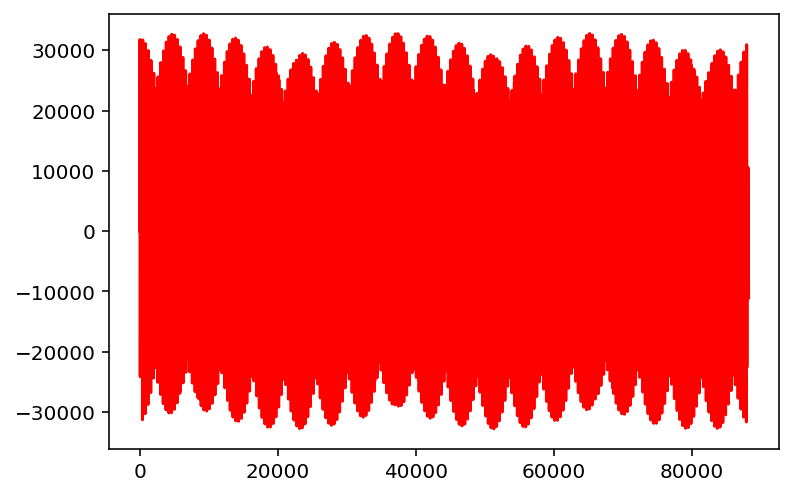

In [3]:
rate, data = wavfile.read(filename)
print("Data rate [units of Hz = 1/seconds] = ",rate)
PrintArrayInfo(data,"data")

plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(data,'r-')
plt.show()

(4) Zoom in and plot only the first 5000 data points.

Data rate [units of Hz = 1/seconds] =  44100
Array: data
shape: (88200,)
dtype: int16
min, max: -32767 32767



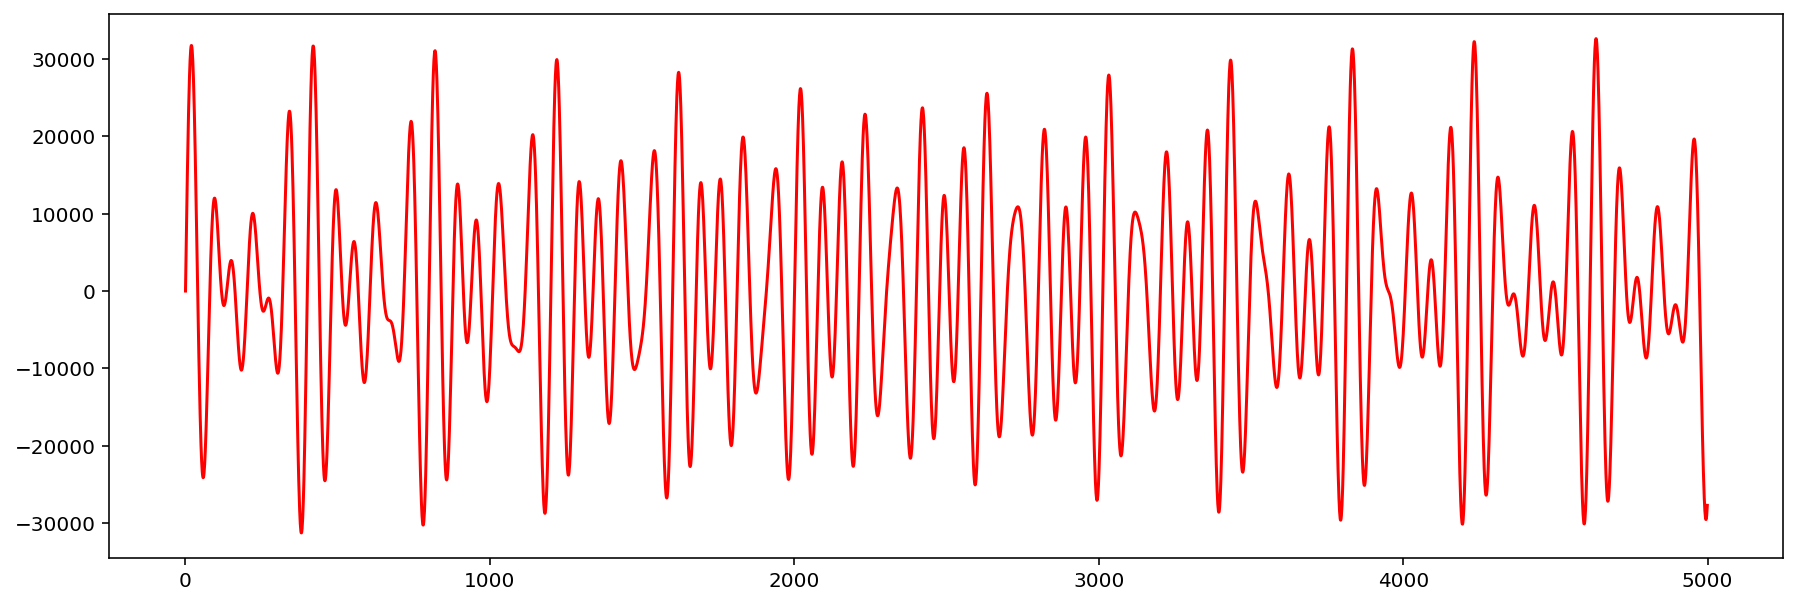

In [4]:
rate, data = wavfile.read(filename)
print("Data rate [units of Hz = 1/seconds] = ",rate)
PrintArrayInfo(data,"data")

plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(data[0:5000],'r-')
plt.show()

There are clearly a number of frequencies hidden in this file. You can hear several of them. Now we want to use discrete Fourier transforms to identify those frequencies $\nu$. 
$$ f^{(sin)}(\nu) = \int_{-\infty}^{+\infty} dt\, x(t)\, \sin(2 \pi \nu t) {\rm ~~~~~~~~and~~~~~~~~}
f^{(cos)}(\nu) = \int_{-\infty}^{+\infty} dt\, x(t)\, \cos(2 \pi \nu t) \,.$$

Instead of continuous function, $f(t)$, our audio signal is provides as a series discrete points $x_{j=0 \ldots n-1}$. $n$ is the number of data points. So our sine and cosine transform assume the following discrete forms:

$$ f^{(sin)}_k = \sum_{j=0}^{n-1} x_j\,\sin \left\{2 \pi \frac{j k}{n} \right\} {\rm ~~~~~~~~~and~~~~~~~~~}
f^{(cos)}_k = \sum_{j=0}^{n-1} x_j\,\cos \left\{2 \pi \frac{j k}{n} \right\}
$$

On a sheet of paper, work out how you convert between time $t$ and index $j$. More importantly work ot the conversion from frequency index $k$ to frequency $\nu$.

(5) Write a Python function that computes $  \left[ f^{(sin)}_k \right]^2 +  \left[ f^{(cos)}_k \right]^2 $ for an arbitrary data set and frequency index $k$.

In [5]:
n=88200

def fksquared(data,k):
    x = 0
    y = 0
    for i in range(len(data)):
        x=x+(data[i]*np.sin(2*np.pi*i*k/n))
        y=y+(data[i]*np.cos(2*np.pi*i*k/n))
    return (x**2 + y**2)

(6) Construct a array of frequency indicies from 800 and 1600 and call this function for every single one. Plot the result as function of frequency index.

Data rate [units of Hz = 1/seconds] =  44100
Array: data
shape: (88200,)
dtype: int16
min, max: -32767 32767

Array: new data
shape: (801,)
dtype: float64
min, max: 437961849384.6206 2.3227307616325994e+17



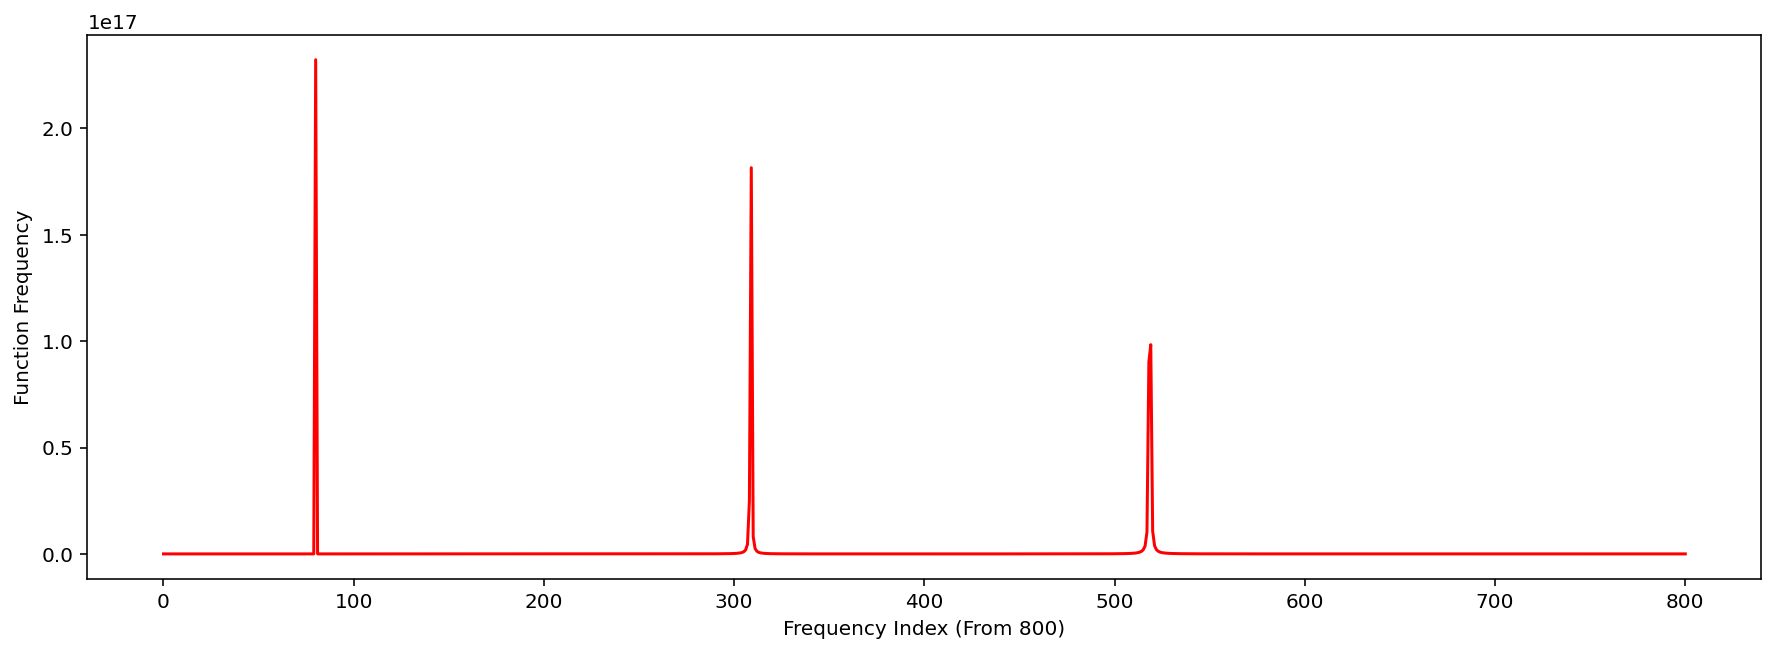

In [6]:
rate, data = wavfile.read(filename)
print("Data rate [units of Hz = 1/seconds] = ",rate)

k1 = 800
k2 = 1600

PrintArrayInfo(data,"data")

karray = np.arange(800,1601,1)
fkarray=fksquared(data,karray)
PrintArrayInfo(fkarray,"new data")

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylabel("Function Frequency")
plt.xlabel("Frequency Index (From 800)")
plt.plot(fkarray,'r-')
plt.show()

(7) Now plot the same results as function of frequency in units of Hertz. What was the frequency of the wave have that you saw in the previous plot? 

Data rate [units of Hz = 1/seconds] =  44100
Array: data
shape: (88200,)
dtype: int16
min, max: -32767 32767

[1.36971655e+02 1.37492881e+02 1.38101530e+02 1.38738657e+02
 1.39376740e+02 1.40029843e+02 1.40649606e+02 1.41267921e+02
 1.41884935e+02 1.42539187e+02 1.43208894e+02 1.43887081e+02
 1.44508613e+02 1.45168944e+02 1.45845440e+02 1.46554361e+02
 1.47204155e+02 1.47894560e+02 1.48572822e+02 1.49271331e+02
 1.49961944e+02 1.50717070e+02 1.51449903e+02 1.52136057e+02
 1.52923665e+02 1.53671384e+02 1.54433529e+02 1.55129870e+02
 1.55907115e+02 1.56629998e+02 1.57426572e+02 1.58207759e+02
 1.59003217e+02 1.59828042e+02 1.60633563e+02 1.61399354e+02
 1.62194013e+02 1.63080133e+02 1.63873479e+02 1.64704775e+02
 1.65520962e+02 1.66413432e+02 1.67263969e+02 1.68100464e+02
 1.69037121e+02 1.69930886e+02 1.70764919e+02 1.71718326e+02
 1.72672714e+02 1.73540300e+02 1.74486916e+02 1.75385853e+02
 1.76326094e+02 1.77293981e+02 1.78263110e+02 1.79291107e+02
 1.80221977e+02 1.81257007e+02 1.822

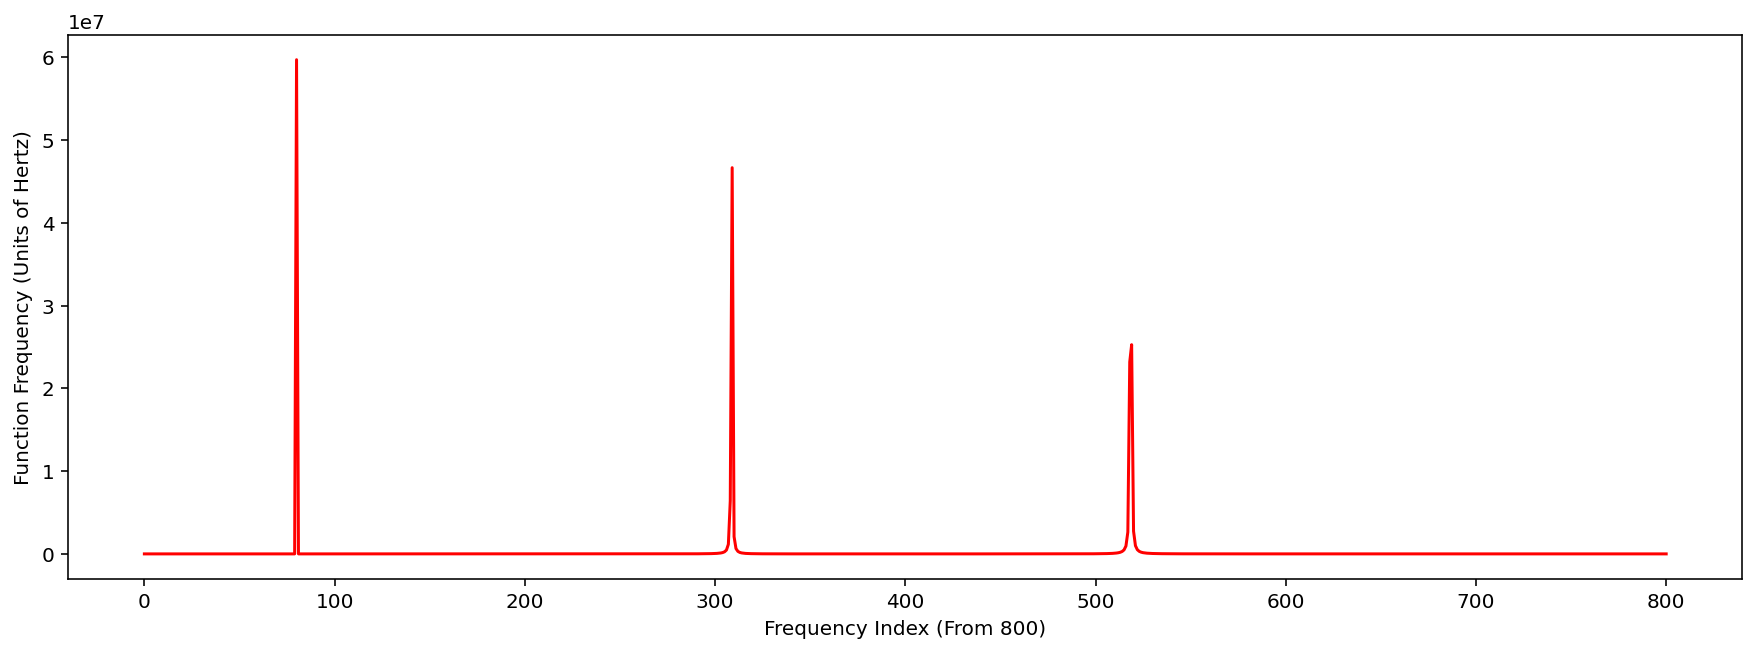

In [7]:
rate, data = wavfile.read(filename)
print("Data rate [units of Hz = 1/seconds] = ",rate)

k1 = 800
k2 = 1600

PrintArrayInfo(data,"data")

karray = np.arange(800,1601,1)
fkarray=fksquared(data,karray)
nu = fkarray/len(data)/44100
print(nu)
PrintArrayInfo(nu,"new data")

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylabel("Function Frequency (Units of Hertz)")
plt.xlabel("Frequency Index (From 800)")
plt.plot(nu,'r-')
plt.show()

(8) Finally we want to speed this calculations by using use fast Fourier transform (FFT) routines that are provided in the NumyPy library. Execute the following lines and see what happens. Compare the two resulting plots with your own diagrams above.

[1246143.          +0.j          393505.51136061+192.12014047j
  393589.53810354+140.77714132j ...  393298.62447869+209.78242779j
  393589.53810353-140.77714132j  393505.51136061-192.12014047j]
(88200,)


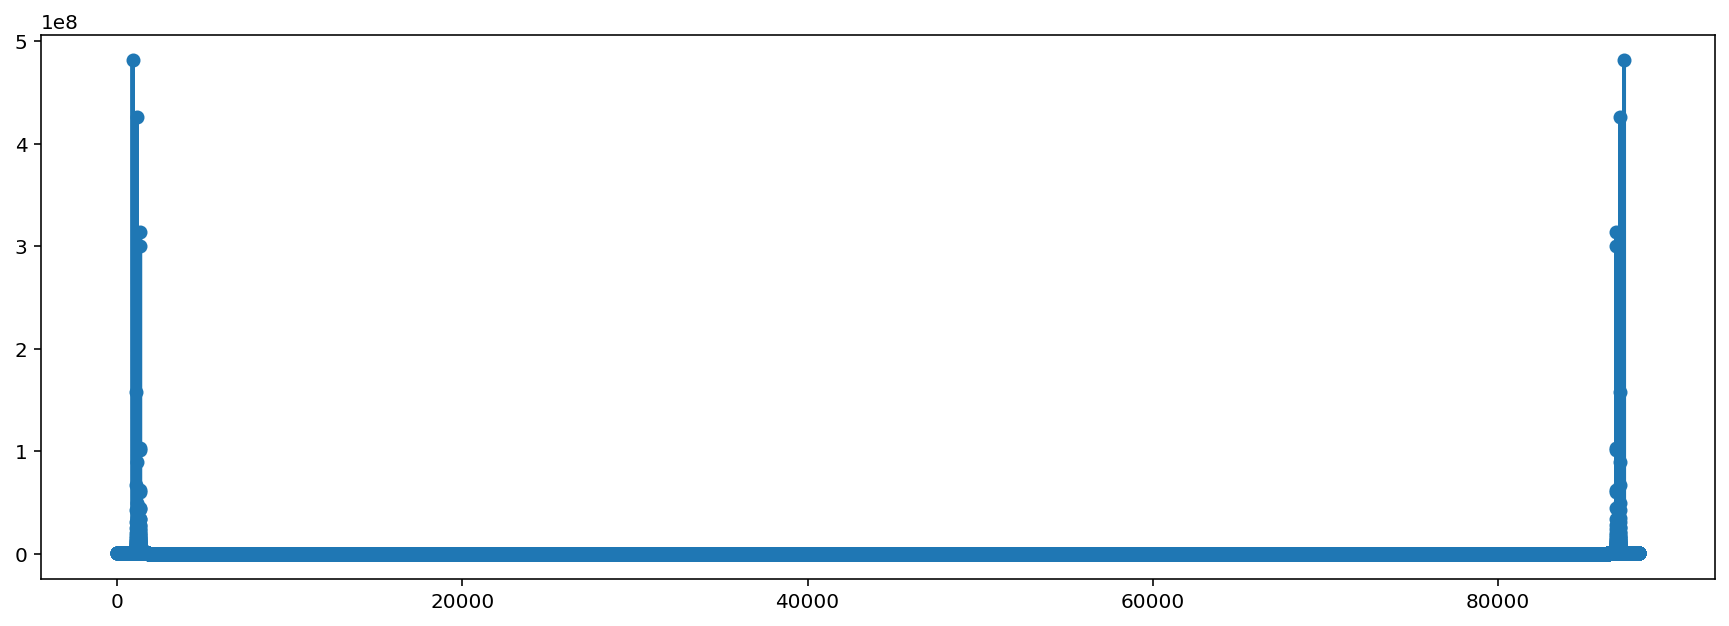

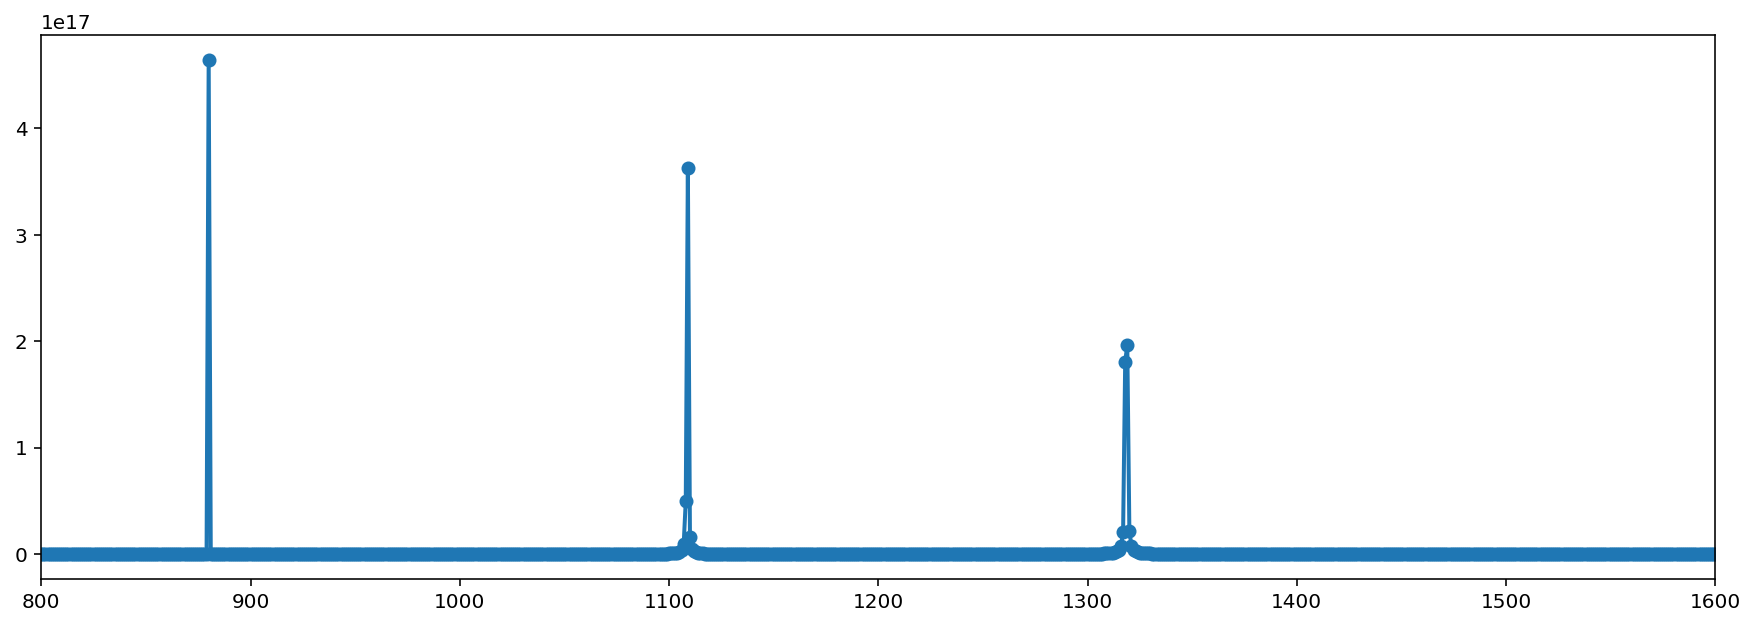

In [8]:
#For FFT, see https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html
ft = np.fft.fft(data)
print(ft)
print(ft.shape)
nn = ft.shape[0]

#plt.xlim(0,2000)
plt.plot(abs(ft),'o-',lw=2)
plt.show()

fAmp = np.zeros(nn//2)
for i in range(1,nn//2):
    fAmp[i] = abs(ft[i])**2 + abs(ft[nn-i])**2

plt.xlim(800,1600)
plt.plot(fAmp,'o-',lw=2)
plt.show()

#Comparison: Two of the plots are essentially identical. However, the plot with the x-axis that expands to a frequency of 88200 is one that I did not get.

(9) Analyze the files "audio_file_A_SID.wav" and "audio_file_C_SID.wav" by repeating the steps above. In each case, plot the Fourier spectrum to illustrate all frequencies that are present. 


Data rate [units of Hz = 1/seconds] =  44100
Array: data
shape: (44100,)
dtype: int16
min, max: -32767 32767

[2.29844209e+08   +0.j         3.03133484e+05 +724.57448709j
 3.03092404e+05+1539.25041307j ... 3.03190233e+05-2323.71885728j
 3.03092404e+05-1539.25041308j 3.03133484e+05 -724.57448709j]
(44100,)


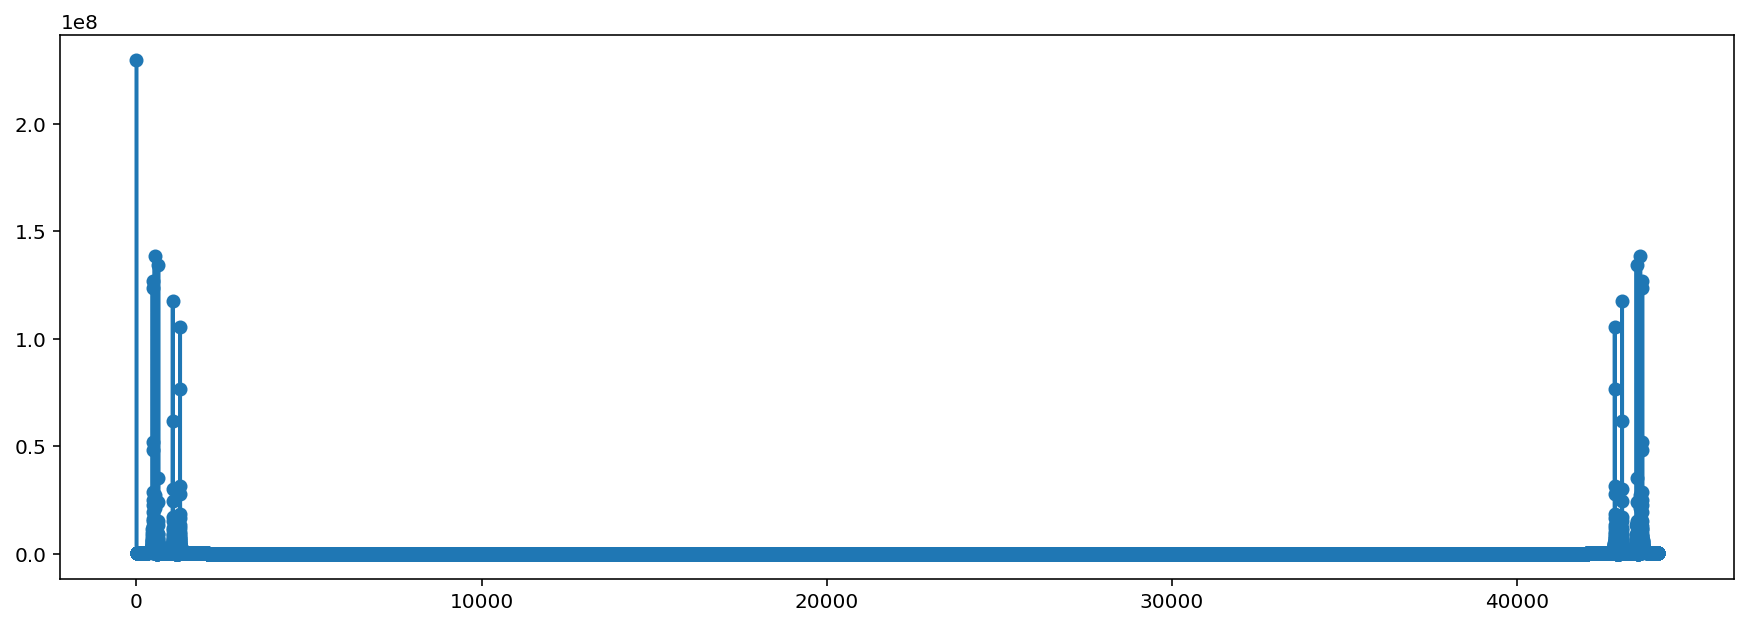

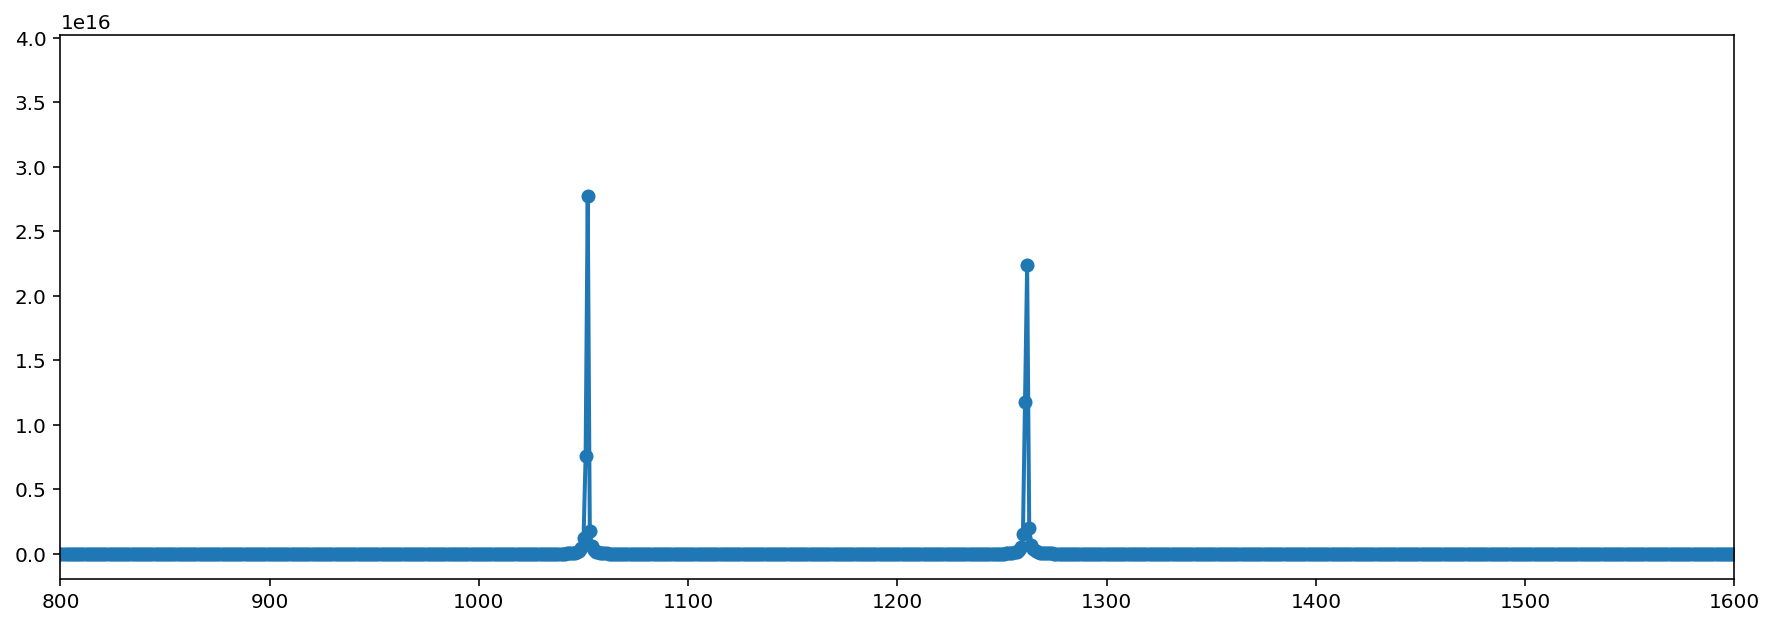

Data rate [units of Hz = 1/seconds] =  44100
Array: data
shape: (88200,)
dtype: int16
min, max: -32767 32767

[489143.         +0.j         419872.80674234+41.78351945j
 419799.40300645+73.40465585j ... 419948.49775498+33.95109332j
 419799.40300646-73.40465585j 419872.80674234-41.78351945j]
(88200,)


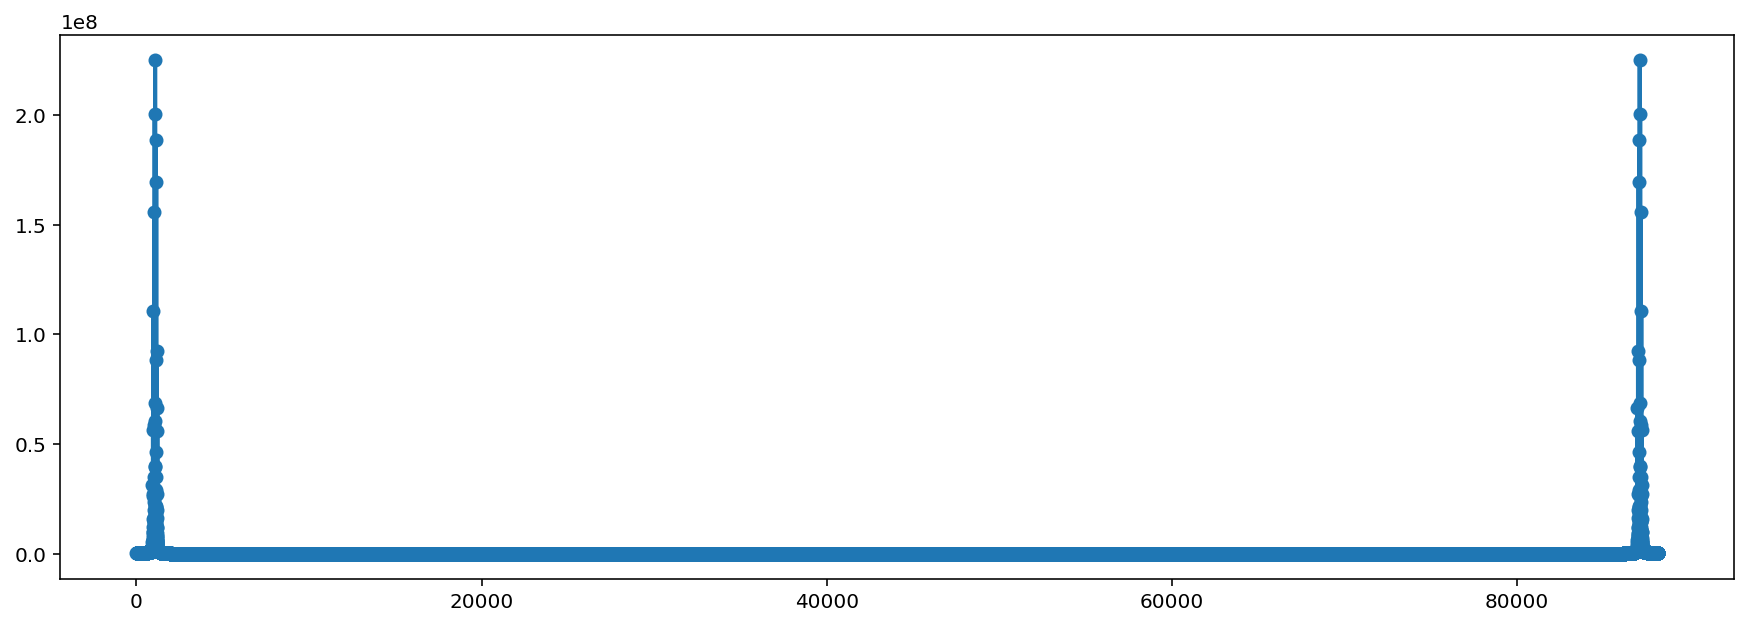

Array: data
shape: (44100,)
dtype: float64
min, max: 0.0 1.0135683436824155e+17



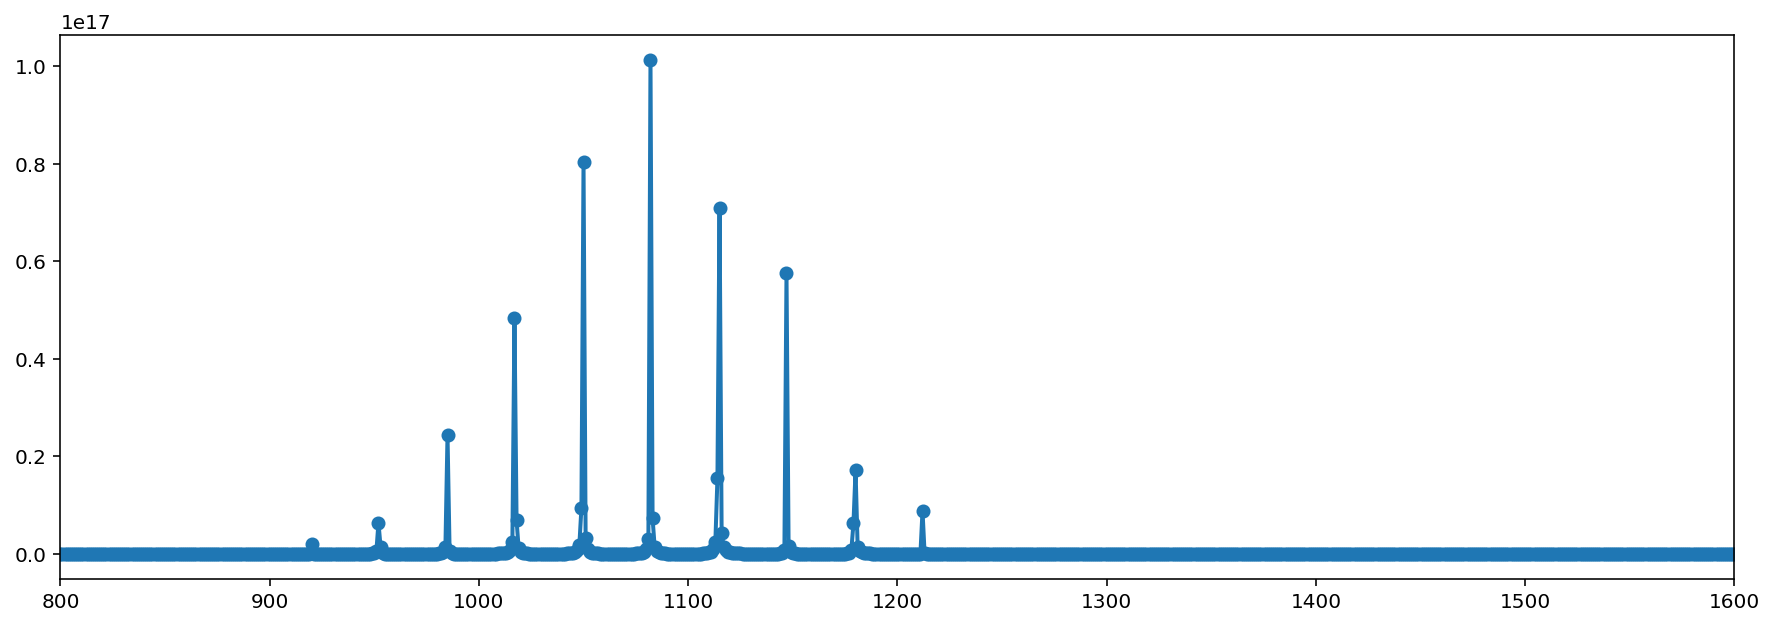

In [9]:
filename = 'audio_file_A_3037743503.wav'
wave_obj = sa.WaveObject.from_wave_file(filename)
play_obj = wave_obj.play()
play_obj.wait_done()  # Wait until sound has finished playing

rate, data = wavfile.read(filename)
print("Data rate [units of Hz = 1/seconds] = ",rate)
PrintArrayInfo(data,"data")

#For FFT, see https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html
ft = np.fft.fft(data)
print(ft)
print(ft.shape)
nn = ft.shape[0]

#plt.xlim(0,2000)
plt.plot(abs(ft),'o-',lw=2)
plt.show()

fAmp = np.zeros(nn//2)
for i in range(1,nn//2):
    fAmp[i] = abs(ft[i])**2 + abs(ft[nn-i])**2

plt.xlim(800,1600)
plt.plot(fAmp,'o-',lw=2)
plt.show()




filename = 'audio_file_C_3037743503.wav'
wave_obj = sa.WaveObject.from_wave_file(filename)
play_obj = wave_obj.play()
play_obj.wait_done()  # Wait until sound has finished playing

rate, data = wavfile.read(filename)
print("Data rate [units of Hz = 1/seconds] = ",rate)
PrintArrayInfo(data,"data")

#For FFT, see https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html
ft = np.fft.fft(data)
print(ft)
print(ft.shape)
nn = ft.shape[0]

#plt.xlim(0,2000)
plt.plot(abs(ft),'o-',lw=2)
plt.show()

fAmp = np.zeros(nn//2)
for i in range(1,nn//2):
    fAmp[i] = abs(ft[i])**2 + abs(ft[nn-i])**2

plt.xlim(800,1600)
plt.plot(fAmp,'o-',lw=2)
PrintArrayInfo(fAmp,"data")
plt.show()


(9a) For file "audio_file_A_SID.wav" , give the frequencies in Hertz of the three waves with the largest amplitude (Excluding frequency zero.): The three frequencies are: 1) 526 (and 43574) 2) 631 (and 43469) 3) 487 (and 43613)

Data rate [units of Hz = 1/seconds] =  44100
Array: data
shape: (44100,)
dtype: int16
min, max: -32767 32767

[2.29844209e+08   +0.j         3.03133484e+05 +724.57448709j
 3.03092404e+05+1539.25041307j ... 3.03190233e+05-2323.71885728j
 3.03092404e+05-1539.25041308j 3.03133484e+05 -724.57448709j]
(44100,)


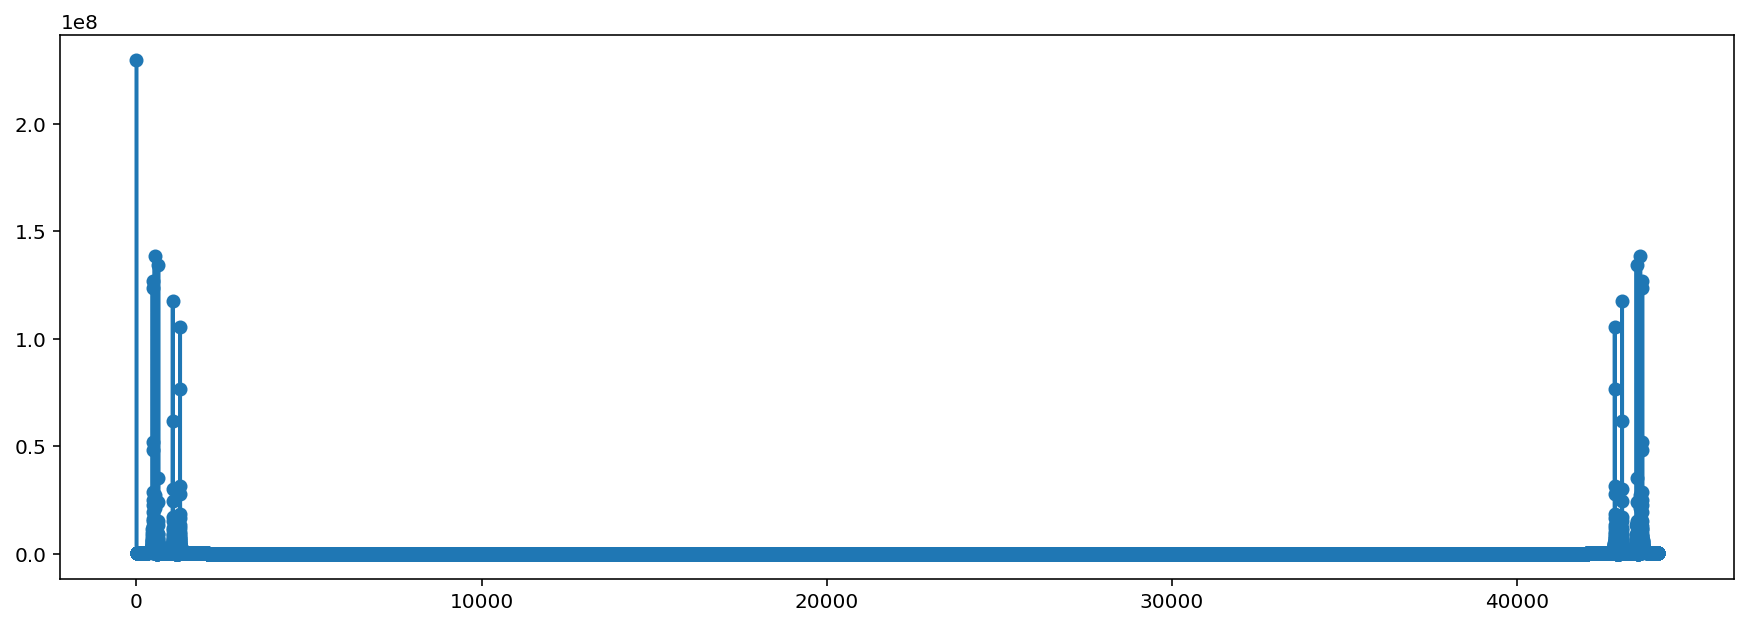

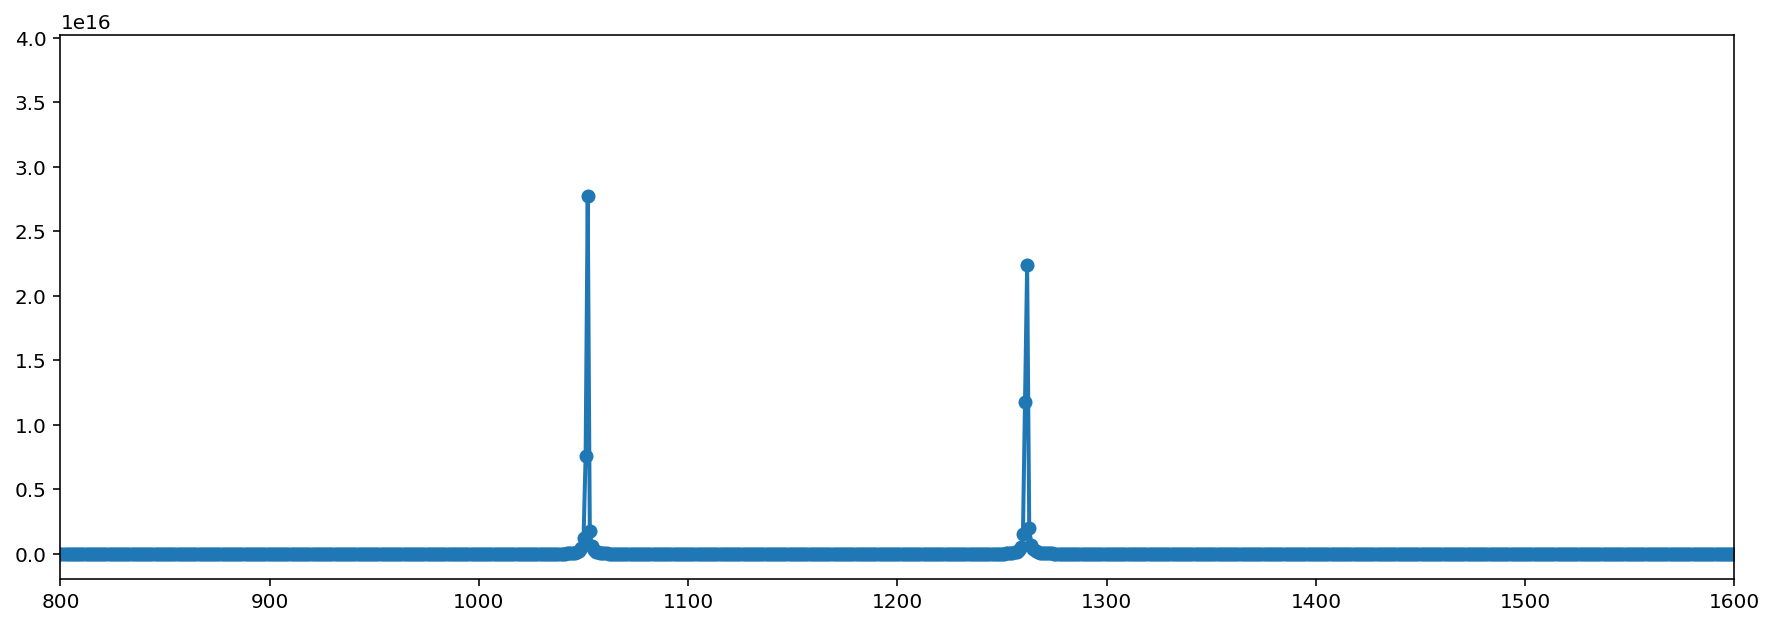

Sorted array: [2.34245241e+04 2.34245241e+04 2.34664079e+04 ... 1.38375564e+08
 1.38375564e+08 2.29844209e+08]
229844209.0
1 largest value: 229844209.0
2 largest value: 138375564.0869154
3 largest value: 138375564.0869154
4 largest value: 134423508.4985765
5 largest value: 134423508.4985765
6 largest value: 126892992.03021178
Tuple of arrays returned :  (array([0], dtype=int64),)
Tuple of arrays returned :  (array([  526, 43574], dtype=int64),)
Tuple of arrays returned :  (array([  631, 43469], dtype=int64),)
Tuple of arrays returned :  (array([  487, 43613], dtype=int64),)


In [10]:
filename = 'audio_file_A_3037743503.wav'
wave_obj = sa.WaveObject.from_wave_file(filename)
play_obj = wave_obj.play()
play_obj.wait_done()  # Wait until sound has finished playing

rate, data = wavfile.read(filename)
print("Data rate [units of Hz = 1/seconds] = ",rate)
PrintArrayInfo(data,"data")

#For FFT, see https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html
ft = np.fft.fft(data)
print(ft)
print(ft.shape)
nn = ft.shape[0]

#plt.xlim(0,2000)
plt.plot(abs(ft),'o-',lw=2)
plt.show()

fAmp = np.zeros(nn//2)
for i in range(1,nn//2):
    fAmp[i] = abs(ft[i])**2 + abs(ft[nn-i])**2

plt.xlim(800,1600)
plt.plot(fAmp,'o-',lw=2)
plt.show()

arr = abs(ft)
sorted_index_array = np.argsort(arr)
  
sorted_array = arr[sorted_index_array]
  
print("Sorted array:", sorted_array)

print(arr[0])

n = 1

rslt = sorted_array[-n : ]
  
print("{} largest value:".format(n),
      rslt[0])

n = 2

rslt = sorted_array[-n : ]
  
print("{} largest value:".format(n),
      rslt[0])

n = 3

rslt = sorted_array[-n : ]
  
print("{} largest value:".format(n),
      rslt[0])

n = 4

rslt = sorted_array[-n : ]
  
print("{} largest value:".format(n),
      rslt[0])

n = 5

rslt = sorted_array[-n : ]
  
print("{} largest value:".format(n),
      rslt[0])

n = 6

rslt = sorted_array[-n : ]
  
print("{} largest value:".format(n),
      rslt[0])

result = np.where(arr == 229844209.0)
print('Tuple of arrays returned : ', result)

result = np.where(arr == 138375564.0869154)
print('Tuple of arrays returned : ', result)

result = np.where(arr == 134423508.4985765)
print('Tuple of arrays returned : ', result)

result = np.where(arr == 126892992.03021178)
print('Tuple of arrays returned : ', result)

(9b) In file "audio_file_C_SID.wav", there are approximately 'N' frequencies present that are centered around frequencies 'f'. I determined N= 9 and f(Hertz)= 1082

Data rate [units of Hz = 1/seconds] =  44100
Array: data
shape: (88200,)
dtype: int16
min, max: -32767 32767

[489143.         +0.j         419872.80674234+41.78351945j
 419799.40300645+73.40465585j ... 419948.49775498+33.95109332j
 419799.40300646-73.40465585j 419872.80674234-41.78351945j]
(88200,)


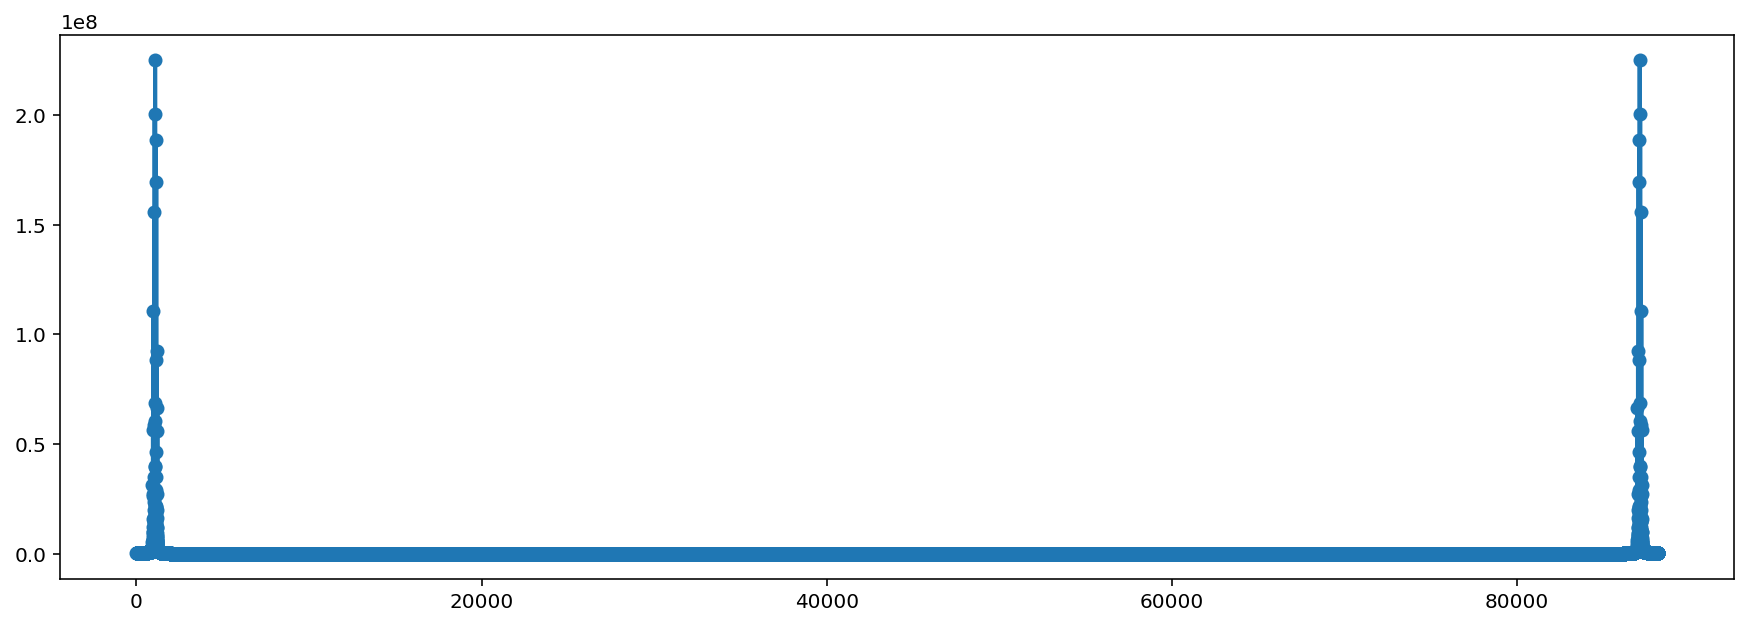

Array: data
shape: (44100,)
dtype: float64
min, max: 0.0 1.0135683436824155e+17



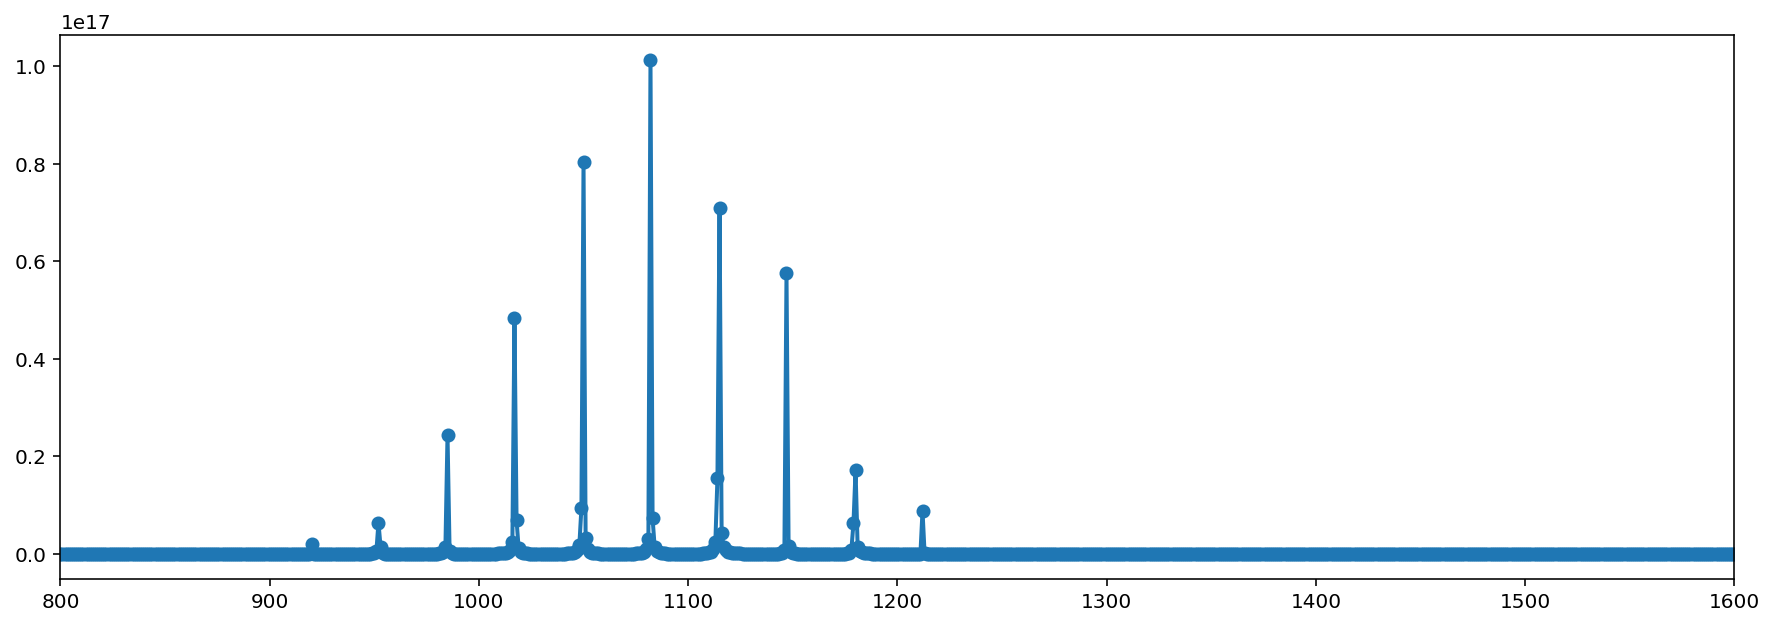

Sorted array: [0.00000000e+00 3.41264377e+05 3.64482381e+05 ... 7.10180660e+16
 8.02765339e+16 1.01356834e+17]
0.0
1 largest value: 1.0135683436824155e+17
Tuple of arrays returned :  (array([1082], dtype=int64),)
2 largest value: 8.027653387073643e+16
Tuple of arrays returned :  (array([1050], dtype=int64),)
3 largest value: 7.101806601918415e+16
Tuple of arrays returned :  (array([1115], dtype=int64),)
4 largest value: 5.753738721074694e+16
Tuple of arrays returned :  (array([1147], dtype=int64),)
5 largest value: 4.838976901675389e+16
Tuple of arrays returned :  (array([1017], dtype=int64),)
6 largest value: 2.441126584115e+16
Tuple of arrays returned :  (array([985], dtype=int64),)
7 largest value: 1.7116673249706388e+16
Tuple of arrays returned :  (array([1180], dtype=int64),)
8 largest value: 1.5524336979730622e+16
Tuple of arrays returned :  (array([1114], dtype=int64),)
9 largest value: 9475247840702932.0
Tuple of arrays returned :  (array([1049], dtype=int64),)
10 largest value

In [11]:
filename = 'audio_file_C_3037743503.wav'
wave_obj = sa.WaveObject.from_wave_file(filename)
play_obj = wave_obj.play()
play_obj.wait_done()  # Wait until sound has finished playing

rate, data = wavfile.read(filename)
print("Data rate [units of Hz = 1/seconds] = ",rate)
PrintArrayInfo(data,"data")

#For FFT, see https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html
ft = np.fft.fft(data)
print(ft)
print(ft.shape)
nn = ft.shape[0]

#plt.xlim(0,2000)
plt.plot(abs(ft),'o-',lw=2)
plt.show()

fAmp = np.zeros(nn//2)
for i in range(1,nn//2):
    fAmp[i] = abs(ft[i])**2 + abs(ft[nn-i])**2

plt.xlim(800,1600)
plt.plot(fAmp,'o-',lw=2)
PrintArrayInfo(fAmp,"data")
plt.show()

arr = fAmp
sorted_index_array = np.argsort(arr)
  
sorted_array = arr[sorted_index_array]
  
print("Sorted array:", sorted_array)

print(arr[0])

for n in range(1,50):
    rslt = sorted_array[-n : ]

    print("{} largest value:".format(n),
          rslt[0])
    result = np.where(arr == rslt[0])
    print('Tuple of arrays returned : ', result)

